# Execution time analysis

In [3]:
%matplotlib notebook

import pandas as pd 
import matplotlib.pyplot as plt
from textwrap import wrap
import numpy as np
import seaborn as sns

files = ["fc_18_0", "fc_18_1", "fcio_18_0", "fcio_18_1",
        "wn_18_0", "wn_18_1","wnio_18_0", "wnio_18_1",
        "mpi_18_0-N2","mpi_18_1-N2", "mpi_18_0-N4","mpi_18_1-N4"]

head = ("elements",
        "fc_18_0", "fc_18_1", "fcio_18_0", "fcio_18_1",
        "wn_18_0", "wn_18_1","wnio_18_0", "wnio_18_1",
        "mpi_n2_18_0","mpi_n2_18_1", "mpi_n4_18_0","mpi_n4_18_1")
dataraw = pd.read_csv('final_consolidated.csv', delimiter=',', names=head, skiprows=1)
dataraw = dataraw.sort_values(by=['elements'])
data_1k = dataraw[0:30]
data_2k = dataraw[30:60]
data_5k = dataraw[60:90]
data_10k = dataraw[90:120]
data_20k = dataraw[120:150]
data_50k = dataraw[150:180]
data_100k = dataraw[180:210]
data_200k = dataraw[210:240]

data = pd.DataFrame(columns=head)
data.loc['1k'] = data_1k.mean()
data.loc['2k'] = data_2k.mean()
data.loc['5k'] = data_5k.mean()
data.loc['10k'] = data_10k.mean()
data.loc['20k'] = data_20k.mean()
data.loc['50k'] = data_50k.mean()
data.loc['100k'] = data_100k.mean()
data.loc['200k'] = data_200k.mean()

head = ("elements",
        "fc_18_0", "fc_18_1", "fcio_18_0", "fcio_18_1",
        "wn_18_0", "wn_18_1","wnio_18_0", "wnio_18_1",
        "mpi_n2_18_0","mpi_n2_18_1", "mpi_n4_18_0","mpi_n4_18_1")

data['fc_mpi_1811'] = data['mpi_n4_18_1']/ data['fc_18_1']
data['fc_mpi_1801'] = data['mpi_n4_18_0']/data['fc_18_0']

data['fcio_mpi_1811'] = data['mpi_n4_18_1'] / data['fcio_18_1']
data['fcio_mpi_1801'] = data['mpi_n4_18_0'] / data['fcio_18_0']

data['wn_mpi_1811'] = data['mpi_n2_18_1'] / data['wn_18_1']
data['wn_mpi_1801'] = data['mpi_n2_18_0'] / data['wn_18_0']

data['wnio_mpi_1811'] = data['mpi_n2_18_1'] / data['wnio_18_1']
data['wnio_mpi_1801'] = data['mpi_n2_18_0'] / data['wnio_18_0']
data = data.reset_index()


def add_annotation(ax, data, name):
    count = 0
    for index, entry in data.iterrows():
    
        if entry[name] > 0:
            ax.annotate("{:.2f}".format(entry[name]), xy=(count,entry[name]), color='green',
                              textcoords='offset points', xytext=(-4,4))
        else:
            ax.annotate("{:.2f}".format(entry[name]), xy=(count, entry[name]), color='red',
                              textcoords='offset points', xytext=(-4,4))
        count = count+1
    


<IPython.core.display.Javascript object>


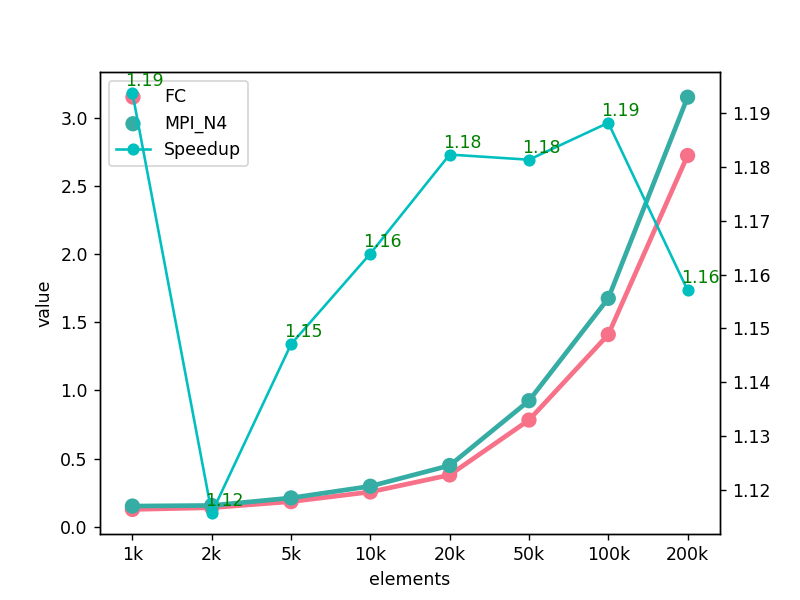

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


['fc_18_1', 'mpi_n4_18_1']
['fc_mpi_1811']


In [36]:
import pandas as pd
import numpy as np
import seaborn
figk_fig, figk_ax  = plt.subplots()
# df = pd.DataFrame(np.random.randn(1000, 4), columns=list("ABCD"))
# df["Y"] = np.random.randint(0, 4, 1000)

datanew = pd.melt(dataraw[['elements','fc_18_1', 'mpi_n4_18_1']], id_vars='elements')
datanew.sort_values(["elements", "variable"], inplace=True)
figk_ax2 = figk_ax.twinx()
# figk_ax2.get_legend().remove()
# figk_ax.set_yscale('log')
# seaborn.factorplot(x="elements", y="value", hue="variable", data=datanew, ax=figk_ax)
seaborn.pointplot(x="elements", y="value", hue="variable", data=datanew, ax=figk_ax, ci=95,
                n_boot=1500, palette='husl', errwidth=1.5, errcolor=".2", capsize=.1)

data[['index','fc_mpi_1811']].plot(x='index', linestyle='-', marker='o', color='c', ax = figk_ax2)

figk_ax2.get_legend().remove()

# df2 = pd.melt(df, id_vars="Y")
# df2
# df2.sort_values(["Y", "variable"], inplace=True)

# df
# 
add_annotation(figk_ax2, data[['index','fc_mpi_1811']], 'fc_mpi_1811')

h1, l1 = figk_ax.get_legend_handles_labels()
print(l1)
h2, l2 = figk_ax2.get_legend_handles_labels()
print(l2)
figk_ax.legend(h1+h2, ['FC', 'MPI_N4', 'Speedup'])# datanew.boxplot(by='elem', column=['value'])
figk_fig.savefig("test.pgf")
figk_fig.savefig("test.pdf")

<IPython.core.display.Javascript object>


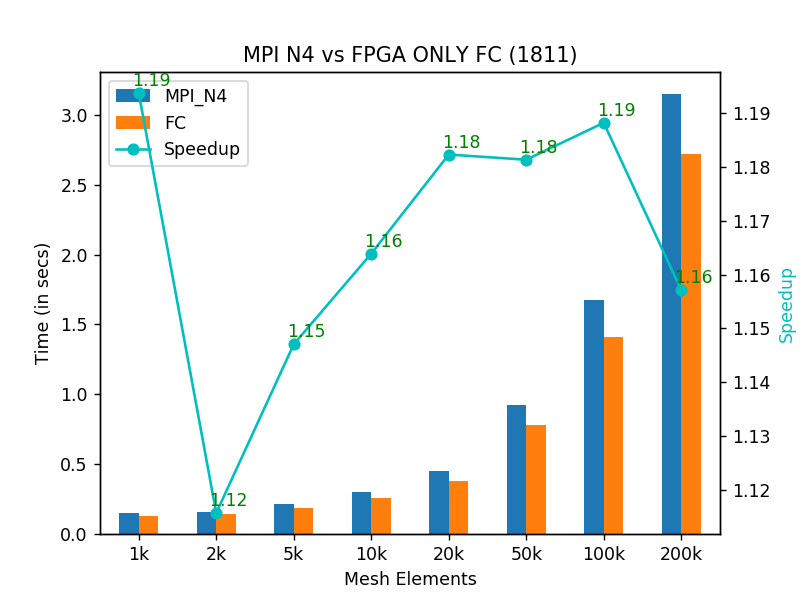

['mpi_n4_18_1', 'fc_18_1']
['fc_mpi_1811']


In [89]:
############################################
# MPI with 4 rings vs FPGA ONLY Fully connected (1811)
############################################
figk_fig, figk_ax  = plt.subplots()
data[['elements', 'mpi_n4_18_1', 'fc_18_1']].plot(x='elements', kind='bar', rot = 0, ax=figk_ax)
figk_ax2 = figk_ax.twinx()
data[['index','fc_mpi_1811']].plot(x='index', linestyle='-', marker='o', color='c', ax = figk_ax2)
# print(data1[['elem','per_opt_mpi']])

add_annotation(figk_ax2, data[['index','fc_mpi_1811']], 'fc_mpi_1811')

figk_ax.set_xlabel('Mesh Elements')
figk_ax.set_ylabel('Time (in secs)')
figk_ax2.set_ylabel('Speedup', color='c')
figk_ax.set_title("\n".join(wrap("MPI N4 vs FPGA ONLY FC (1811) ", 60)))

# figk_ax.legend()
figk_ax2.get_legend().remove()

h1, l1 = figk_ax.get_legend_handles_labels()
print(l1)
h2, l2 = figk_ax2.get_legend_handles_labels()
print(l2)
figk_ax.legend(h1+h2, ['MPI_N4', 'FC', 'Speedup'])

<IPython.core.display.Javascript object>


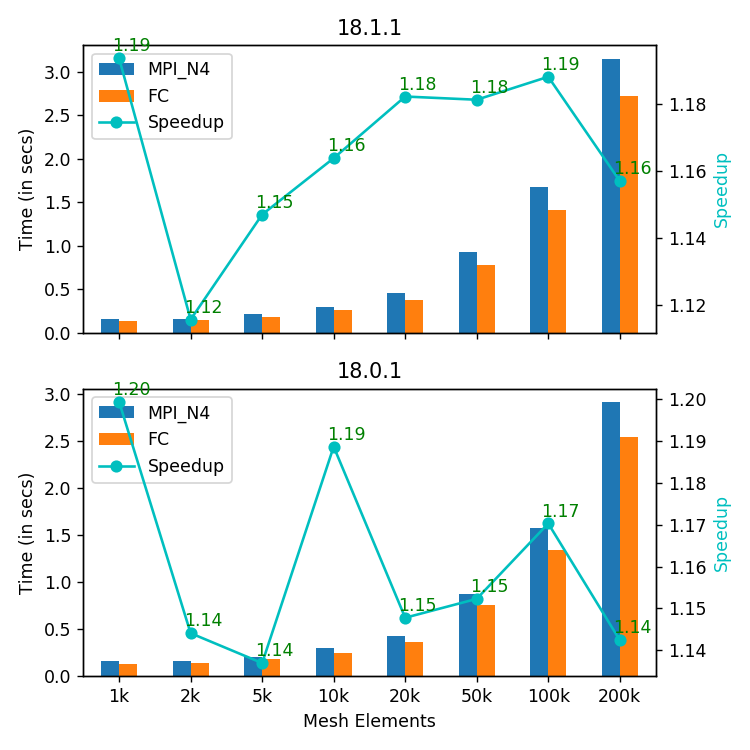

In [90]:
############################################
# MPI with 4 rings vs FPGA ONLY Fully connected (1801)
############################################
figk_ax2 = []
figk_fig, figk_ax  = plt.subplots(ncols=1, nrows=2, figsize=(6,6), tight_layout=True)
data[['elements', 'mpi_n4_18_1', 'fc_18_1']].plot(x='elements', kind='bar', rot = 0, ax=figk_ax[0])
data[['elements', 'mpi_n4_18_0', 'fc_18_0']].plot(x='elements', kind='bar', rot = 0, ax=figk_ax[1])
figk_ax2.append(figk_ax[0].twinx())
figk_ax2.append(figk_ax[1].twinx())

data[['index','fc_mpi_1811']].plot(x='index', linestyle='-', marker='o', color='c', ax = figk_ax2[0])
data[['index','fc_mpi_1801']].plot(x='index', linestyle='-', marker='o', color='c', ax = figk_ax2[1])

add_annotation(figk_ax2[0], data[['index','fc_mpi_1811']], 'fc_mpi_1811')
add_annotation(figk_ax2[1], data[['index','fc_mpi_1801']], 'fc_mpi_1801')
figk_ax[0].set_title("\n".join(wrap("18.1.1", 60)))
figk_ax[1].set_title("\n".join(wrap("18.0.1", 60)))
for (ax, ax2) in zip(figk_ax,figk_ax2) :
    ax.set_xlabel('Mesh Elements')
    ax.set_ylabel('Time (in secs)')
    
    ax2.set_ylabel('Speedup', color='c')
    ax2.get_legend().remove()
    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax.legend(h1+h2, ['MPI_N4', 'FC', 'Speedup'])
    


<IPython.core.display.Javascript object>


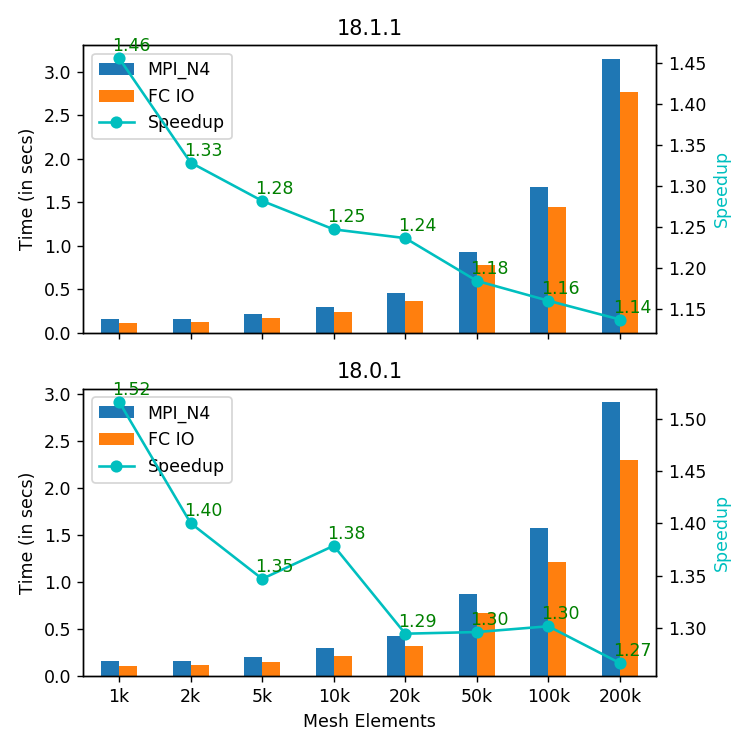

In [91]:
############################################
# MPI with 4 rings vs IO Channel Fully connected (1801)
############################################
figk_ax2 = []
figk_fig, figk_ax  = plt.subplots(ncols=1, nrows=2, figsize=(6,6), tight_layout=True)
data[['elements', 'mpi_n4_18_1', 'fcio_18_1']].plot(x='elements', kind='bar', rot = 0, ax=figk_ax[0])
data[['elements', 'mpi_n4_18_0', 'fcio_18_0']].plot(x='elements', kind='bar', rot = 0, ax=figk_ax[1])
figk_ax2.append(figk_ax[0].twinx())
figk_ax2.append(figk_ax[1].twinx())

data[['index','fcio_mpi_1811']].plot(x='index', linestyle='-', marker='o', color='c', ax = figk_ax2[0])
data[['index','fcio_mpi_1801']].plot(x='index', linestyle='-', marker='o', color='c', ax = figk_ax2[1])

add_annotation(figk_ax2[0], data[['index','fcio_mpi_1811']], 'fcio_mpi_1811')
add_annotation(figk_ax2[1], data[['index','fcio_mpi_1801']], 'fcio_mpi_1801')
figk_ax[0].set_title("\n".join(wrap("18.1.1", 60)))
figk_ax[1].set_title("\n".join(wrap("18.0.1", 60)))
for (ax, ax2) in zip(figk_ax,figk_ax2) :
    ax.set_xlabel('Mesh Elements')
    ax.set_ylabel('Time (in secs)')
    
    ax2.set_ylabel('Speedup', color='c')
    ax2.get_legend().remove()
    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax.legend(h1+h2, ['MPI_N4', 'FC IO', 'Speedup'])

<IPython.core.display.Javascript object>


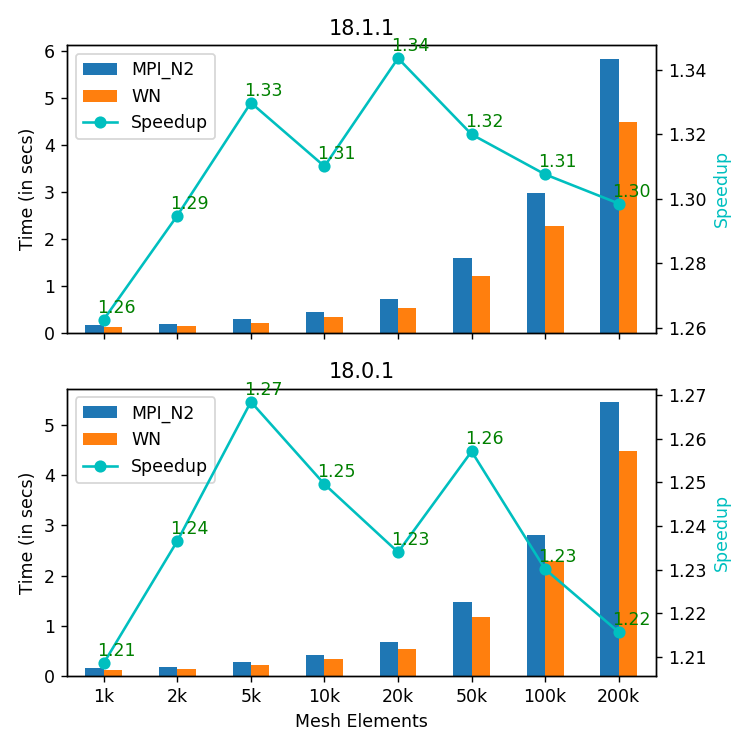

In [121]:
############################################
# MPI with 2 rings vs FPGA ONLY Fully connected
############################################
figk_ax2 = []
figk_fig, figk_ax  = plt.subplots(ncols=1, nrows=2, figsize=(6,6), tight_layout=True)
data[['elements', 'mpi_n2_18_1', 'wn_18_1']].plot(x='elements', kind='bar', rot = 0, ax=figk_ax[0])
data[['elements', 'mpi_n2_18_0', 'wn_18_0']].plot(x='elements', kind='bar', rot = 0, ax=figk_ax[1])
figk_ax2.append(figk_ax[0].twinx())
figk_ax2.append(figk_ax[1].twinx())

data[['index','wn_mpi_1811']].plot(x='index', linestyle='-', marker='o', color='c', ax = figk_ax2[0])
data[['index','wn_mpi_1801']].plot(x='index', linestyle='-', marker='o', color='c', ax = figk_ax2[1])

add_annotation(figk_ax2[0], data[['index','wn_mpi_1811']], 'wn_mpi_1811')
add_annotation(figk_ax2[1], data[['index','wn_mpi_1801']], 'wn_mpi_1801')
figk_ax[0].set_title("\n".join(wrap("18.1.1", 60)))
figk_ax[1].set_title("\n".join(wrap("18.0.1", 60)))
for (ax, ax2) in zip(figk_ax,figk_ax2) :
    ax.set_xlabel('Mesh Elements')
    ax.set_ylabel('Time (in secs)')
    
    ax2.set_ylabel('Speedup', color='c')
    ax2.get_legend().remove()
    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax.legend(h1+h2, ['MPI_N2', 'WN', 'Speedup'])

<IPython.core.display.Javascript object>


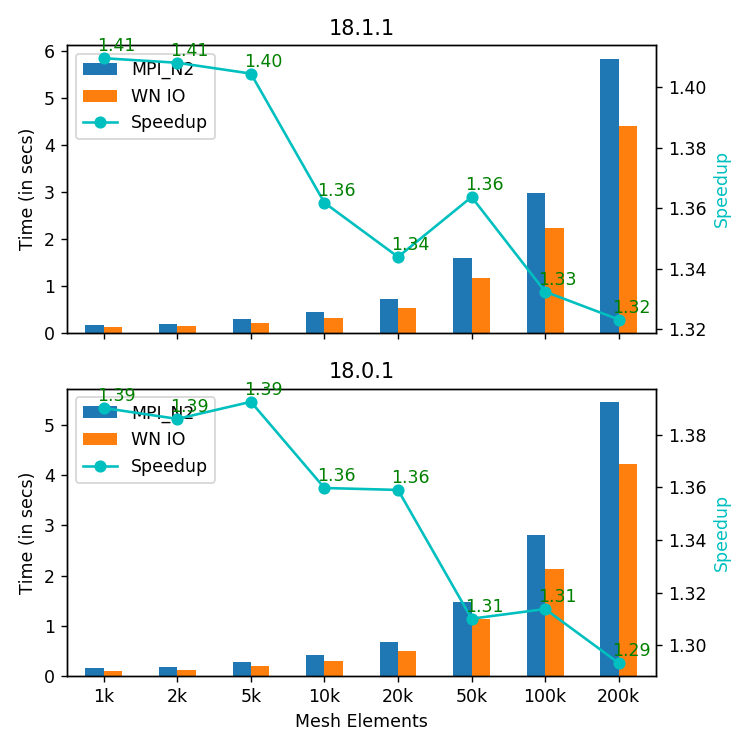

In [37]:
############################################
# MPI with 2 rings vs FPGA ONLY Fully connected
############################################
figk_ax2 = []
figk_fig, figk_ax  = plt.subplots(ncols=1, nrows=2, figsize=(6,6), tight_layout=True)
data[['elements', 'mpi_n2_18_1', 'wnio_18_1']].plot(x='elements', kind='bar', rot = 0, ax=figk_ax[0])
data[['elements', 'mpi_n2_18_0', 'wnio_18_0']].plot(x='elements', kind='bar', rot = 0, ax=figk_ax[1])
figk_ax2.append(figk_ax[0].twinx())
figk_ax2.append(figk_ax[1].twinx())

data[['index','wnio_mpi_1811']].plot(x='index', linestyle='-', marker='o', color='c', ax = figk_ax2[0])
data[['index','wnio_mpi_1801']].plot(x='index', linestyle='-', marker='o', color='c', ax = figk_ax2[1])

add_annotation(figk_ax2[0], data[['index','wnio_mpi_1811']], 'wnio_mpi_1811')
add_annotation(figk_ax2[1], data[['index','wnio_mpi_1801']], 'wnio_mpi_1801')
figk_ax[0].set_title("\n".join(wrap("18.1.1", 60)))
figk_ax[1].set_title("\n".join(wrap("18.0.1", 60)))
for (ax, ax2) in zip(figk_ax,figk_ax2) :
    ax.set_xlabel('Mesh Elements')
    ax.set_ylabel('Time (in secs)')
    
    ax2.set_ylabel('Speedup', color='c')
    ax2.get_legend().remove()
    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax.legend(h1+h2, ['MPI_N2', 'WN IO', 'Speedup'])